In [1]:
# Importing libraries
import pandas as pd

In [2]:
# Reading traffic.csv file
df = pd.read_csv('traffic.csv')
df.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


📊 Dataset Overview
Total Rows: 48,120

Total Columns: 4

📁 Columns Description
Column Name	Data Type	Description
DateTime	Object (string)	Timestamp of traffic data in the format YYYY-MM-DD HH:MM:SS. Represents the date and hour the data was recorded.
Junction	int64	Indicates the junction number where traffic data was collected. (e.g., 1, 2, etc.)
Vehicles	int64	Number of vehicles recorded at that junction during the corresponding hour.
ID	int64	Unique identifier for each row, possibly encoding the date and junction info. Example: 20151101001 represents 1st Nov 2015, Junction 1.

🔍 Data Quality
No missing values in any of the columns.

DateTime column should be converted to datetime type for time-based analysis.

📈 Use Cases
This dataset can be used for:

Traffic pattern analysis

Time series forecasting (vehicle count)

Identifying peak and off-peak hours

Load analysis across different junctions.

In [3]:
# To get the column names
df.columns

Index(['DateTime', 'Junction', 'Vehicles', 'ID'], dtype='object')

In [4]:
# To get the all columns information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
# To get the description of the numerical columns
df.describe()

,Junction,Vehicles,ID
count,48120.000000,48120.000000,4.812000e+04
mean,2.180549,22.791334,2.016330e+10
std,0.966955,20.750063,5.944854e+06
min,1.000000,1.000000,2.015110e+10
25%,1.000000,9.000000,2.016042e+10
50%,2.000000,15.000000,2.016093e+10
75%,3.000000,29.000000,2.017023e+10
max,4.000000,180.000000,2.017063e+10


In [6]:
# 1. Data Preprocessing
# Convert DateTime column to pandas datetime format.

# Check for nulls and handle if any.

# Extract useful features like Hour, Day, Weekday, Month from DateTime.

# Convert DateTime to datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Extract time-based features
df['Hour'] = df['DateTime'].dt.hour
df['Day'] = df['DateTime'].dt.day
df['Weekday'] = df['DateTime'].dt.day_name()
df['Month'] = df['DateTime'].dt.month

In [7]:
# To see appended columns
df.head()

,DateTime,Junction,Vehicles,ID,Hour,Day,Weekday,Month
0,2015-11-01 00:00:00,1,15,20151101001,0,1,Sunday,11
1,2015-11-01 01:00:00,1,13,20151101011,1,1,Sunday,11
2,2015-11-01 02:00:00,1,10,20151101021,2,1,Sunday,11
3,2015-11-01 03:00:00,1,7,20151101031,3,1,Sunday,11
4,2015-11-01 04:00:00,1,9,20151101041,4,1,Sunday,11


In [10]:
# To check null values
df.isnull().sum()

,0
DateTime,0
Junction,0
Vehicles,0
ID,0
Hour,0
Day,0
Weekday,0
Month,0


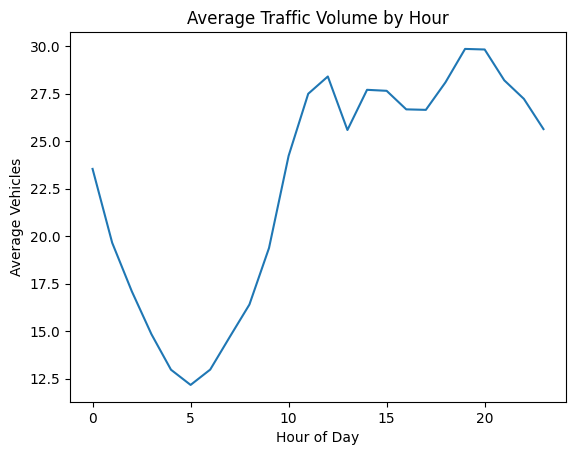

In [11]:
# 2. Plot Traffic Density Over Time
# Line plot: Average vehicles per hour.

# Heatmap: Traffic volume by weekday and hour.

# Bar plot: Traffic per junction.

import seaborn as sns
import matplotlib.pyplot as plt

# Line plot: Avg traffic by hour
hourly_avg = df.groupby('Hour')['Vehicles'].mean()
hourly_avg.plot(kind='line', title='Average Traffic Volume by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Vehicles')
plt.show()

This graph shows that average traffic volume is lowest around 5 AM and gradually increases throughout the day. Peak traffic occurs between 7 PM and 9 PM, indicating evening congestion hours.

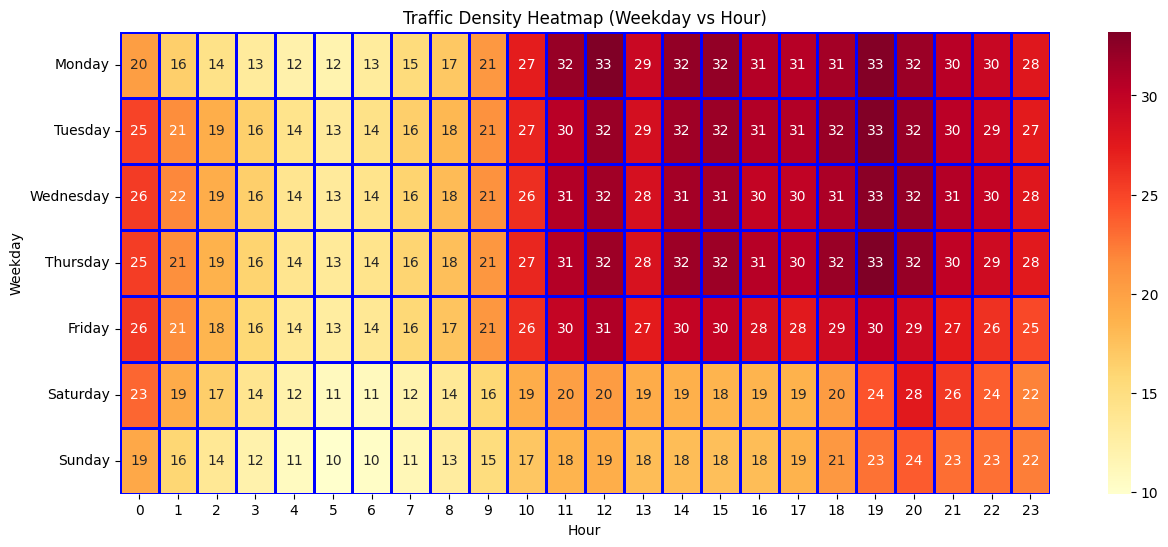

In [12]:
# Heatmap: Weekday vs Hour

plt.figure(figsize=(15, 6))
pivot = df.pivot_table(values='Vehicles', index='Weekday', columns='Hour', aggfunc='mean')
pivot = pivot.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
sns.heatmap(pivot, cmap='YlOrRd', annot=True, fmt='.0f',linewidths=2, linecolor='b')
plt.title('Traffic Density Heatmap (Weekday vs Hour)')
plt.show()

This heatmap reveals that weekdays (Monday to Friday) consistently experience high traffic volumes between 11 AM and 8 PM, peaking especially between 12 PM and 5 PM. In contrast, weekends show significantly lower traffic, with Saturday and Sunday maintaining lighter volumes throughout the day.

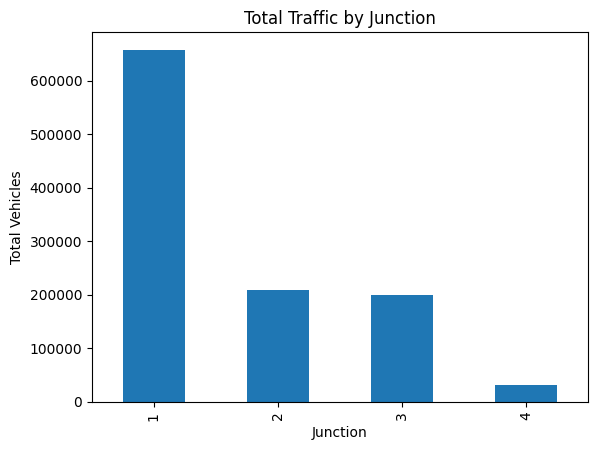

In [13]:
# Bar chart: Total traffic by junction

junction_sum = df.groupby('Junction')['Vehicles'].sum()
junction_sum.plot(kind='bar', title='Total Traffic by Junction')
plt.ylabel('Total Vehicles')
plt.show()

This bar chart shows that Junction 1 handles the highest traffic volume, significantly more than the others. Junction 4 has the lowest traffic, suggesting it may be in a less busy area or underutilized.

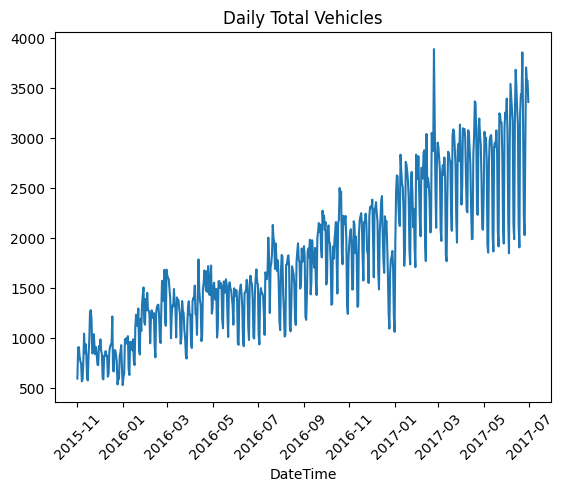

In [14]:
# 3. Identify Anomalies / Trends
# Check sudden spikes or drops in traffic by plotting daily or hourly traffic.

# Use rolling averages or z-scores to detect outliers.

# Daily vehicle count

daily = df.groupby(df['DateTime'].dt.date)['Vehicles'].sum()
daily.plot(title="Daily Total Vehicles")
plt.xticks(rotation=45)
plt.show()


This graph shows a steady upward trend in daily vehicle counts from late 2015 to mid-2017, indicating increasing traffic over time. The recurring spikes suggest weekly or seasonal traffic patterns on top of the overall growth.

In [15]:
# 4. Predict Peak Hours (Optional Regression)
# Use features like Hour, Weekday, Junction to predict Vehicles using Linear Regression.

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Encode weekday
df['Weekday_num'] = df['DateTime'].dt.weekday

# Features and target
X = df[['Hour', 'Weekday_num', 'Junction']]
y = df['Vehicles']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
print(y_pred)

[21.64783462 13.66281592 12.37285787 ... 20.33668621  6.36091891
 34.15248235]


In [16]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 226.65
R² Score: 0.44


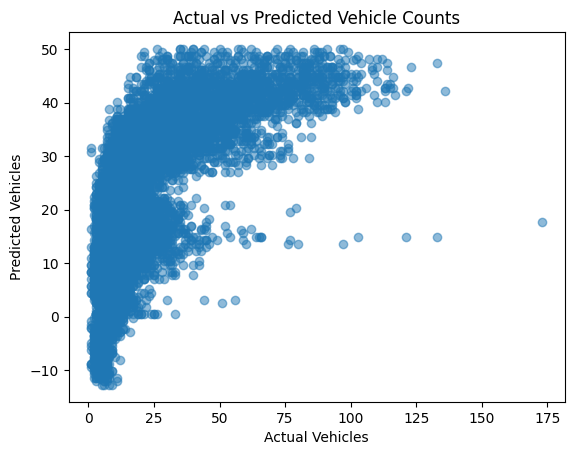

In [17]:
# Plotting Actual vs Predicted Vehicle Counts
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Vehicles")
plt.ylabel("Predicted Vehicles")
plt.title("Actual vs Predicted Vehicle Counts")
plt.show()


This scatter plot shows that most predictions cluster correctly for lower actual vehicle counts, but prediction accuracy drops as actual counts increase. The model tends to underestimate higher traffic volumes, indicating a need for further tuning or feature enhancements.